<a href="https://colab.research.google.com/github/zanepriebe/cse455-final-project/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***EVERYTHING BELOW THIS WAS FROM JOE'S TUTORIAL AND CAN BE REMOVED (I HAVEN'T REMOVED IT YET BECAUSE I THOUGHT IT MIGHT BE HELPFUL? I'M NOT SURE)***

In [ ]:
%matplotlib inline


Tensors
--------------------------------------------

Tensors are a specialized data structure that are very similar to arrays
and matrices. In PyTorch, we use tensors to encode the inputs and
outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on
GPUs or other specialized hardware to accelerate computing. If you’re familiar with ndarrays, you’ll
be right at home with the Tensor API. If not, follow along in this quick
API walkthrough.




In [ ]:
import torch
import numpy as np

Tensor Initialization
~~~~~~~~~~~~~~~~~~~~~

Tensors can be initialized in various ways. Take a look at the following examples:

**Directly from data**

Tensors can be created directly from data. The data type is automatically inferred.



In [ ]:
data = [[1, 2, 5],[3, 4, 1]]
x_data = torch.tensor(data, dtype=torch.float32)
print(x_data)

tensor([[1., 2., 5.],
        [3., 4., 1.]])


In [ ]:
print(x_data.size())

torch.Size([2, 3])


In [ ]:
print(x_data.dtype)

torch.float32


**From a NumPy array**

Tensors can be created from NumPy arrays (and vice versa - see `bridge-to-np-label`).



In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

**From another tensor:**

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.



In [ ]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Random Tensor: 
 tensor([[0.1074, 0.7984, 0.6526],
        [0.6090, 0.4602, 0.7684]]) 



**With random or constant values:**

``shape`` is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.



In [ ]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.9102, 0.3554, 0.5249],
        [0.2222, 0.7222, 0.1730]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


--------------




Tensor Attributes
~~~~~~~~~~~~~~~~~

Tensor attributes describe their shape, datatype, and the device on which they are stored.



In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


--------------




Tensor Operations
~~~~~~~~~~~~~~~~~

Over 100 tensor operations, including transposing, indexing, slicing,
mathematical operations, linear algebra, random sampling, and more are
comprehensively described
`here <https://pytorch.org/docs/stable/torch.html>`__.

Each of them can be run on the GPU (at typically higher speeds than on a
CPU). If you’re using Colab, allocate a GPU by going to Edit > Notebook
Settings.




In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

In [ ]:
print(tensor)

tensor([[0.5511, 0.3579, 0.4352, 0.7897],
        [0.3190, 0.7519, 0.8802, 0.0222],
        [0.1756, 0.9256, 0.4246, 0.5621]])


Try out some of the operations from the list.
If you're familiar with the NumPy API, you'll find the Tensor API a breeze to use.




**Standard numpy-like indexing and slicing:**



In [ ]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**Joining tensors** You can use ``torch.cat`` to concatenate a sequence of tensors along a given dimension.
See also `torch.stack <https://pytorch.org/docs/stable/generated/torch.stack.html>`__,
another tensor joining op that is subtly different from ``torch.cat``.



In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


**Multiplying tensors**



In [ ]:
tensor = torch.rand(4,4)
tensor2 = torch.rand(4,4)
print(tensor)
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor2)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor2}")

tensor([[0.2841, 0.4750, 0.4269, 0.6623],
        [0.8921, 0.5680, 0.5376, 0.6816],
        [0.5278, 0.6801, 0.4703, 0.8705],
        [0.9937, 0.3063, 0.1588, 0.9069]])
tensor.mul(tensor) 
 tensor([[0.2226, 0.1069, 0.3729, 0.5194],
        [0.7049, 0.2360, 0.2209, 0.3133],
        [0.4009, 0.3798, 0.3991, 0.5064],
        [0.2531, 0.2833, 0.0678, 0.0023]]) 

tensor * tensor 
 tensor([[0.2226, 0.1069, 0.3729, 0.5194],
        [0.7049, 0.2360, 0.2209, 0.3133],
        [0.4009, 0.3798, 0.3991, 0.5064],
        [0.2531, 0.2833, 0.0678, 0.0023]])


This computes the matrix multiplication between two tensors



In [ ]:
tensor = torch.rand(4,3)
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[0.4040, 0.4621, 0.6901, 0.4123],
        [0.4621, 1.1270, 0.8620, 0.2152],
        [0.6901, 0.8620, 1.4509, 0.9561],
        [0.4123, 0.2152, 0.9561, 0.8347]]) 

tensor @ tensor.T 
 tensor([[0.4040, 0.4621, 0.6901, 0.4123],
        [0.4621, 1.1270, 0.8620, 0.2152],
        [0.6901, 0.8620, 1.4509, 0.9561],
        [0.4123, 0.2152, 0.9561, 0.8347]])


**Tensor Projecting** PyTorch will automaticall infer how to handle some operations when tensor sizes don't match up perfectly. In this example you can multiply a scalar, a row matrix, or a column matrix by a 2d matrix and get the same result. This is both a feature and a potential hassle because it can hide bugs if you aren't careful!

In [ ]:
tones = torch.ones(4,2)
ttwos = 2 * tones
tworow = 2 * torch.ones(1,2)
twocol = 2 * torch.ones(4,1)

row = torch.tensor([[1,2]])

print(tones)
print(ttwos)
print(tworow)
print(twocol)
print(row)
print(ttwos * row)

#ttwos2 = tones * tworow
#ttwos3 = tones * twocol

#print(ttwos)
#print(ttwos2)
#print(ttwos3)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[2., 2.]])
tensor([[2.],
        [2.],
        [2.],
        [2.]])
tensor([[1, 2]])
tensor([[2., 4.],
        [2., 4.],
        [2., 4.],
        [2., 4.]])


#Training a Neural Network in PyTorch#

PyTorch is a powerful, widely-used machine learning library. It has all the latest neural network layers and functions and supports GPU computation.

Most neural network research these days either happens in PyTorch or TensorFlow. Google Research develops TensorFlow while Facebook AI Research develops PyTorch. Functionally they are probably very similar, I just know a lot of people who use PyTorch and it seems like it might be somewhat easier for beginners to learn. It is important to have some experience in one of these two frameworks but if you understand the ideas and concepts you shouldn't have too much trouble moving between them.

The `torch` library provides the basic functions we need when dealing with `tensors`. `tensors` are a generalization of matrices to arbirtrary numbers of dimensions (a matrix is a 2D tensor). Types of tensors:


*   0 dimensional: Scalar
*   1 dimensional: Array
*   2 dimensional: Matrix
*   3 dimensional: Number cubey thingy
*   4 dimensional: ?????

Anywho, let's start with our opening chant to invoke the power of PyTorch to aid us. The last line is a special call to the GPU gods to smile on our endeavor.


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


##Time For Some Data##

PyTorch has some built tools for downloading and loading common datasets. We'll be playing around with MNIST in this example. It is a dataset of 28x28 grayscale handwritten digits 0-9. There are 60,000 images in the training set and 10,000 in the test set.



In [ ]:
def get_mnist_data():
  trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True,
                                        transform=transforms.ToTensor())
  trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True,
                                            num_workers=8)

  testset = torchvision.datasets.MNIST(root='./data', train=False, download=True,
                                      transform=transforms.ToTensor())
  testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False,
                                          num_workers=8)
  classes = range(10)
  return {'train': trainloader, 'test': testloader, 'classes': classes}

data = get_mnist_data()

100%|██████████| 9912422/9912422 [00:00<00:00, 188646943.56it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 64059066.01it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 61137113.33it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 12607894.62it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw




/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
print(data['train'].__dict__)

{'dataset': Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor(), 'num_workers': 8, 'prefetch_factor': 2, 'pin_memory': False, 'pin_memory_device': '', 'timeout': 0, 'worker_init_fn': None, '_DataLoader__multiprocessing_context': None, '_dataset_kind': 0, 'batch_size': 32, 'drop_last': False, 'sampler': <torch.utils.data.sampler.RandomSampler object at 0x7f3e1de21e10>, 'batch_sampler': <torch.utils.data.sampler.BatchSampler object at 0x7f3e1de21a50>, 'generator': None, 'collate_fn': <function default_collate at 0x7f3e21911870>, 'persistent_workers': False, '_DataLoader__initialized': True, '_IterableDataset_len_called': None, '_iterator': None}


###Understanding Our Data ###
It's worthwhile to check out how our dataloader loads the images into tensors. We can print out the size of the loaded data in the `images` tensors.



In [ ]:
# get some random training images
dataiter = iter(data['train'])
images, labels = next(dataiter)
print(images.size())

torch.Size([32, 1, 28, 28])


Our `images` tensor is 4-dimensional, (32 x 1 x 28 x 28)

PyTorch stores image data in (N x C x H x W) format. Thus the size of this tensor implies we have a mini-batch of 32 images, each have a single channel (grayscale), and each image is 28 x 28, so that makes sense!

We can use matplotlib to see what our data looks like:

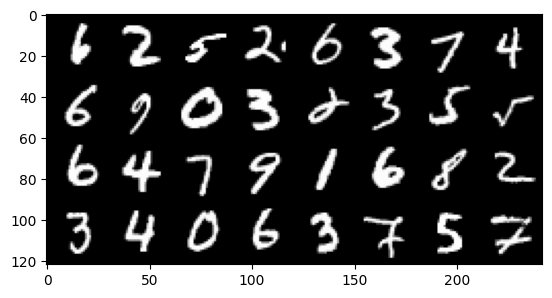

Labels:        6         2         5         2         6         3         7         4
torch.Size([32, 1, 28, 28])
torch.Size([32, 784])


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print("Labels:" + ' '.join('%9s' % data['classes'][labels[j]] for j in range(8)))


flat = torch.flatten(images, 1)
print(images.size())
print(flat.size())


##A Simple Network##

First we'll build a very basic neural network with a single hidden layer of neurons. This means one fully connected layer of weights connects the input to the hidden neurons and one fully connected layer connects the hidden neurons to the output. We'll use the RELU activation function on the hidden neuron values as our nonlinearity.

These fully connected (or `nn.Linear`) layers expect a 2D input tensor where that is N x I where N is the number of data points in a mini batch and I is the number of inputs. However, our data is formatted in (N x C x H x W) right now so we need to tell PyTorch to rearrange it using `torch.flatten`.

After being `flatten`ed our data goes from (32 x 1 x 28 x 28) to being (32 x 784)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class SoftmaxModel(nn.Module):
    def __init__(self, inputs=28*28, outputs=10):
        super(SoftmaxModel, self).__init__()
        self.fc1 = nn.Linear(inputs, outputs)

    def forward(self, x):
        x = torch.flatten(x, 1) # Turns list of images into list of vectors
        x = self.fc1(x)
        return x        # Return unnormalized probabilities

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class SimpleNet(nn.Module):
    def __init__(self, inputs=28*28, hidden=512, outputs=10):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(inputs, hidden)
        self.fc2 = nn.Linear(hidden, outputs)

    def forward(self, x):
        x = torch.flatten(x, 1) # Turns list of images into list of vectors
        x = self.fc1(x)
        x = F.leaky_relu(x)   # activaction function: 92.4% -> 98.6% accuracy
        x = self.fc2(x) # Note: no activation function at the end
        return x        # Return unnormalized probabilities

###The Training Function ###

Now for training our network. Our `train` function takes as input the `net` to train and the `dataloader` for the training data. It also takes some optional parameters to control training.

For our network we'll be using PyTorch's built in `nn.CrossEntropyLoss`. This will apply a softmax to our network's output, calculate the log-probability assigned to each class, then try to minimize the negative log likelihood of our data (AKA maximize the likelihood)

For our optimizer we are using stochastic gradient descent with learning rate, momentum, and decay parameters.

In [ ]:
import torch.optim as optim

def train(net, dataloader, epochs=1, lr=0.01, momentum=0.9, decay=0.0005, verbose=1):
  net.to(device)
  losses = []
  criterion = nn.CrossEntropyLoss() # Is softmax + negative log likelihood
  optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum, weight_decay=decay)
  for epoch in range(epochs):
    sum_loss = 0.0
    for i, batch in enumerate(dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = batch[0].to(device), batch[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize 
        outputs = net(inputs) # forward pass
        loss = criterion(outputs, labels) # calculating loss
        loss.backward()  # autograd magic, computes all the partial derivatives
        optimizer.step() # takes a step in negative gradient direction

        # print statistics
        losses.append(loss.item())
        sum_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            if verbose:
              print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, sum_loss / 100))
            sum_loss = 0.0
  return losses

###Training The Network###

We'll instantiate a new network and train it on our training data.

Our training function prints out some debug information about the epoch, batch number, and current loss values. It also returns a list of all the losses on our mini-batches so we can plot them all once training has finished.

[1,   100] loss: 1.355
[1,   200] loss: 0.502
[1,   300] loss: 0.426
[1,   400] loss: 0.374
[1,   500] loss: 0.317
[1,   600] loss: 0.343
[1,   700] loss: 0.293
[1,   800] loss: 0.285
[1,   900] loss: 0.280
[1,  1000] loss: 0.260
[1,  1100] loss: 0.252
[1,  1200] loss: 0.243
[1,  1300] loss: 0.251
[1,  1400] loss: 0.221
[1,  1500] loss: 0.245
[1,  1600] loss: 0.219
[1,  1700] loss: 0.217
[1,  1800] loss: 0.217
[2,   100] loss: 0.181
[2,   200] loss: 0.183
[2,   300] loss: 0.168
[2,   400] loss: 0.157
[2,   500] loss: 0.160
[2,   600] loss: 0.176
[2,   700] loss: 0.158
[2,   800] loss: 0.169
[2,   900] loss: 0.129
[2,  1000] loss: 0.154
[2,  1100] loss: 0.155
[2,  1200] loss: 0.166
[2,  1300] loss: 0.144
[2,  1400] loss: 0.148
[2,  1500] loss: 0.130
[2,  1600] loss: 0.163
[2,  1700] loss: 0.129
[2,  1800] loss: 0.136
[3,   100] loss: 0.126
[3,   200] loss: 0.117
[3,   300] loss: 0.115
[3,   400] loss: 0.110
[3,   500] loss: 0.114
[3,   600] loss: 0.108
[3,   700] loss: 0.116
[3,   800] 

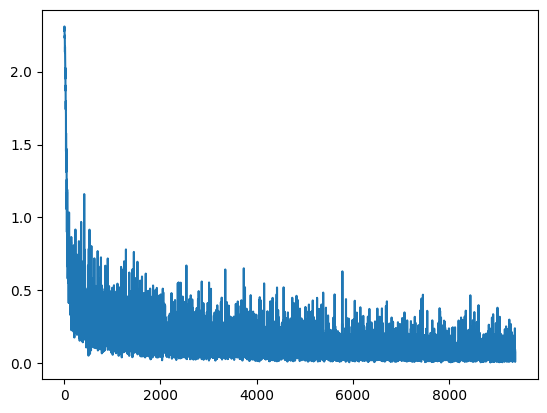

In [ ]:
net = SimpleNet()

losses = train(net, data['train'], epochs=5)
plt.plot(losses)

##Testing The Network##

We trained our network! The loss went down! That's good, right? But how good is our network, exactly?

Well, we can try running our network on a few of our test images and see what happens:

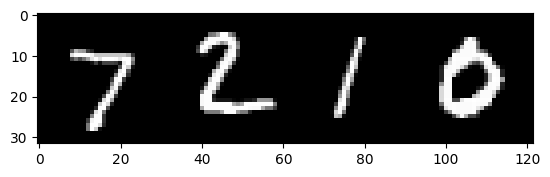

GroundTruth:      7     2     1     0
Predicted:      7     2     1     0


In [ ]:
dataiter = iter(data['test'])
images, labels = next(dataiter)

images = images[:4]
labels = labels[:4]

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % data['classes'][labels[j]] for j in range(4)))
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % data['classes'][predicted[j]]
                              for j in range(4)))

Pretty good so far. But we also want to be able to test the network on all of our data. Here's a function that can do just that, computing the accuracy on a full set of data:

In [ ]:
def accuracy(net, dataloader):
  correct = 0
  total = 0
  with torch.no_grad():
      for batch in dataloader:
          images, labels = batch[0].to(device), batch[1].to(device)
          outputs = net(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  return correct/total

Now we can give it a try:

In [ ]:
print("Current accuracy: %f" % accuracy(net, data['train']))

Current accuracy: 0.983000


In [ ]:
print("Current accuracy: %f" % accuracy(net, data['test']))

Current accuracy: 0.975200


In [ ]:
class LeNet(nn.Module):
    def __init__(self, num_classes=10):
        super(LeNet, self).__init__()
        
        self.features = nn.Sequential( #Input will be 1 x 32 x 32
            nn.Conv2d(1, 6, kernel_size=5), # Output will be 6 x 28 x 28
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2, stride=2), # Output will be 6 x 14 x 14
            nn.Conv2d(6, 16, kernel_size=5), # Output will be 16 x 10 x 10
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2, stride=2) # Output will be 16 x 5 x 5
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(16 * 4 * 4, 120),
            nn.Tanh(),
            nn.Linear(120, 84),
            nn.Tanh(),
            nn.Linear(84, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

[1,   100] loss: 2.100
[1,   200] loss: 0.715
[1,   300] loss: 0.417
[1,   400] loss: 0.293
[1,   500] loss: 0.253
[1,   600] loss: 0.221
[1,   700] loss: 0.154
[1,   800] loss: 0.144
[1,   900] loss: 0.139
[1,  1000] loss: 0.126
[1,  1100] loss: 0.113
[1,  1200] loss: 0.090
[1,  1300] loss: 0.088
[1,  1400] loss: 0.084
[1,  1500] loss: 0.103
[1,  1600] loss: 0.094
[1,  1700] loss: 0.092
[1,  1800] loss: 0.074
[2,   100] loss: 0.069
[2,   200] loss: 0.088
[2,   300] loss: 0.067
[2,   400] loss: 0.065
[2,   500] loss: 0.070
[2,   600] loss: 0.066
[2,   700] loss: 0.053
[2,   800] loss: 0.065
[2,   900] loss: 0.068
[2,  1000] loss: 0.068
[2,  1100] loss: 0.057
[2,  1200] loss: 0.067
[2,  1300] loss: 0.067
[2,  1400] loss: 0.040
[2,  1500] loss: 0.049
[2,  1600] loss: 0.071
[2,  1700] loss: 0.050
[2,  1800] loss: 0.053
[3,   100] loss: 0.044
[3,   200] loss: 0.044
[3,   300] loss: 0.050
[3,   400] loss: 0.059
[3,   500] loss: 0.044
[3,   600] loss: 0.045
[3,   700] loss: 0.047
[3,   800] 

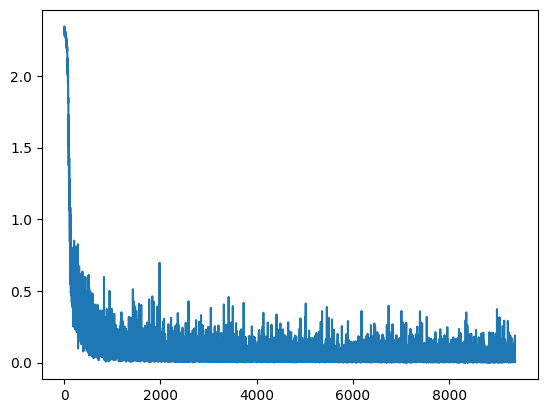

In [ ]:
lenet = LeNet()

losses = train(lenet, data['train'], epochs=5)
plt.plot(losses)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[1,   100] loss: 0.022
[1,   200] loss: 0.024
[1,   300] loss: 0.019
[1,   400] loss: 0.022
[1,   500] loss: 0.024
[1,   600] loss: 0.023
[1,   700] loss: 0.021
[1,   800] loss: 0.022
[1,   900] loss: 0.016
[1,  1000] loss: 0.027
[1,  1100] loss: 0.023
[1,  1200] loss: 0.021
[1,  1300] loss: 0.019
[1,  1400] loss: 0.020
[1,  1500] loss: 0.028
[1,  1600] loss: 0.023
[1,  1700] loss: 0.019
[1,  1800] loss: 0.026


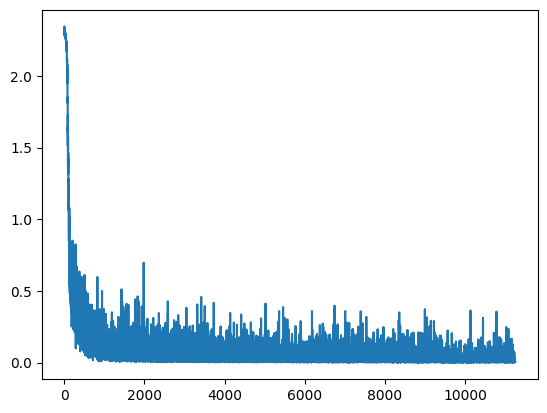

In [ ]:
losses += train(lenet, data['train'], lr=.001, epochs=1)
plt.plot(losses)

In [ ]:
print("Current accuracy: %f" % accuracy(lenet, data['test']))

Current accuracy: 0.990000


##Experiments##

Now it's time to poke around a little bit with our models. First I just want this utility function to do window smoothing of data for us. As you may have noticed, we are doing *stochastic* gradient descent, so our losses for each mini-batch can vary quite dramatically. If we smooth them out a little bit they will be easier to look at when we plot them.

In [ ]:
def smooth(x, size):
  return np.convolve(x, np.ones(size)/size, mode='same')

###Learning Rate###

Let's experiment around with the learning rate of our model. Changing the learning rate should affect how fast our model converges and how accurate it is. We can see the effect when we plot out the loss function over time for models with different learning rates:

In [ ]:
net_high = SimpleNet()
losses_high = train(net_high, data['train'], lr=.1, verbose=1)
acc_high = accuracy(net_high, data['test'])
plt.plot(smooth(losses_high,20), 'r-')


net_mid = SimpleNet()
losses_mid = train(net_mid, data['train'], lr=.01, verbose=1)
acc_mid = accuracy(net_mid, data['test'])
plt.plot(smooth(losses_mid,20), 'b-')


net_low = SimpleNet()
losses_low = train(net_low, data['train'], lr=.001, verbose=1)
acc_low = accuracy(net_low, data['test'])
plt.plot(smooth(losses_low,20), 'g-')

print(acc_high, acc_mid, acc_low)

###Momentum###

We are using the default value for momentum of `0.9`. Fix your value for the learning rate and try varying the values for momentum.


In [ ]:
#Write your code here for experimenting with different values of momentum.

###Weight Decay###

Right now we aren't using any weight decay with our model. However, it can be useful as a method of regularization if we are worried about overfitting.


In [ ]:
#Write your code here for experimenting with different weight decay

###A Bigger Model###

Before we used a very simple model but now it's time to try adding some complexity. Create a network that takes as input the 28x28 image, 10 outputs, and any number of layers as long as it has fewer than 2,000,000 connections. Our simple network before had 784\*512 + 512\*10 = 406,528 connections.

Use only fully connected (`nn.Linear`) layers (we'll get to other layer types soon). However, play around with different [activation functions](https://pytorch.org/docs/stable/nn.functional.html#non-linear-activation-functions), [losses](https://pytorch.org/docs/stable/nn.html#loss-functions), and hyperparameter settings. You can also try different training regimes. For example, you could try lowering the learning rate during training by calling our training method twice like this:

    train(net, data['train'], epochs=5, lr=.1)
    train(net, data['train'], epochs=3, lr=.01)
    train(net, data['train'], epochs=2, lr=.001)

Maybe it works better? Why did I choose those particular numbers? Who knows! It's deep learning, no one really knows what will work you have to just try things and see.

Experiment with different network architectures and settings to get the most accurate model.

In [ ]:
#Write your new model and experiments here

class ExperiNet(nn.Module):
    def __init__(self):
        super(ExperiNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x